In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

In [2]:
import utils.mnist_reader as mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
pipe_svm = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', SVC(probability=False))
])

param_grid = {
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 0.01, 0.001]
}

grid_svm = GridSearchCV(
    pipe_svm,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
grid_svm.fit(X_train, y_train)

print("Best CV accuracy:", grid_svm.best_score_)
print("Best parameters:", grid_svm.best_params_)

best_svm = grid_svm.best_estimator_
y_pred = best_svm.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_acc:.4%}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ....svm__C=0.1, svm__gamma=0.01, svm__kernel=linear; total time= 6.4min
[CV] END ....svm__C=0.1, svm__gamma=0.01, svm__kernel=linear; total time= 6.4min
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time= 6.4min
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time= 6.5min
[CV] END ....svm__C=0.1, svm__gamma=0.01, svm__kernel=linear; total time= 6.5min
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time= 6.5min
[CV] END .......svm__C=0.1, svm__gamma=0.01, svm__kernel=rbf; total time=12.4min
[CV] END ......svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=12.4min
[CV] END ......svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=12.4min
[CV] END ......svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=12.4min
[CV] END ...svm__C=0.1, svm__gamma=0.001, svm__kernel=linear; total time= 6.9min
[CV] END ...svm__C=0.1, svm__gamma=0.001, svm__k

In [8]:
print(f"Test accuracy: {test_acc:.4f}\n")
print(classification_report(y_test, y_pred))

Test accuracy: 0.9003

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.84      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.83      0.84      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.75      0.72      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



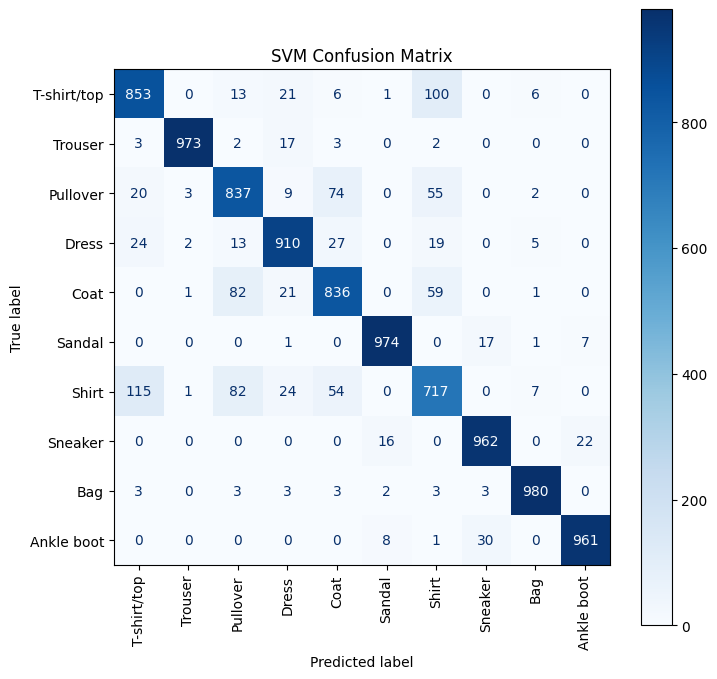

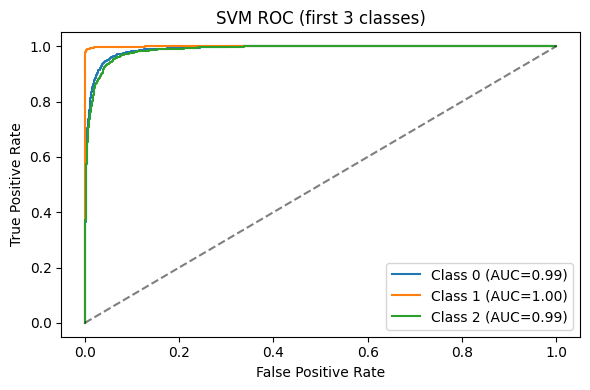

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[
    'T-shirt/top','Trouser','Pullover','Dress','Coat',
    'Sandal','Shirt','Sneaker','Bag','Ankle boot'
])
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical')
plt.title("SVM Confusion Matrix")
plt.show()


best_svm_prob = best_svm.set_params(svm__probability=True)
best_svm_prob.fit(X_train, y_train)
probs = best_svm_prob.predict_proba(X_test)

plt.figure(figsize=(6,4))
for idx in range(3):
    fpr, tpr, _ = roc_curve((y_test==idx).astype(int), probs[:,idx])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {idx} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC (first 3 classes)")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
